# GENDER AND STOCK MARKET PARTICIPATION
_Karl Stavem_

## Table of Contents
1.  [Motivation and Problem Statement](#motivation)
1.  [Research Questions and Hypotheses](#rq)
1.  [Background and Related Work](#brr)
1.  [Data](#dd)
1.  [Methodology](#methodology)
1.  [Data Preprocessing](#dpp)
1.  [Findings](#findings)
1.  [Discussion](#discussion)
1.  [Conclusion](#conclusion)

<span id="motivation"/>
    
### Motivation and Problem Statement
This study looks at the stock market and the ways in which participation varies by gender.  Because there is a significant and well-established [gender pay gap](https://www.pewresearch.org/fact-tank/2019/03/22/gender-pay-gap-facts/) it is vital to understand the ways this may lead to a exponential disparity in accumulated wealth and retirement savings.

<span id="rq"/>

### Research Questions and Hypotheses

There are two specific questions that I will address in this analysis:

- _Q 1:  Do women participate in the stock market at a lower rate than men?_
- _Q 2.1:  What are they key factors that affect stock market participation?_  
- _Q 2.2:  Do these key factors disproportionally affect women?_

My initial hypothesis is that women participate in the stock market at a lower rate than men.   I expect that this drop in participation is driven less by differences in attitudes or perceptions and more.


<span id="brr" />

### Background and Related Work
Many financial advisory firms have conducted independent research into these issues in the past.   For example Northwestern Mutual has routinely [published findings](https://news.northwesternmutual.com/planning-and-progress-2019) outlining general attitudes and bevahiors around money and investing.   Addtionally, FINRA publishes results from the National Financial Capability Study on [their website](https://www.usfinancialcapability.org/results.php?region=US) every three years.  However, most of these studies do not specifically focus on gender.

<span id="dd" />

### Data


#### Descrption
The primary dataset used to address these questions is the _2018 National Financial Capability Study (NFCS)_, funded by the FINRA Investor Education Foundation.  The NFCS is a longitudinal survey conducted across the United States every three years.   The goal of the survey is to benchmark key indicators of financial capability in U.S. households and evaluate how these indictors vary by regions, attitudes, and demographics.  While this is a longitudinal survey that has been conducted every three years since 2009, my analysis focuses exclusively on the 2018 dataset.  While the FINRA Investor Education Foundation publishes its own findings on this data, it has made the datasets, questionaires, and documents available to outside researchers.

#### Dimensions
The 2018 NFCS contains responses from roughly 27,000 households across all 50 states.  Each respondent provided answers to 127 different questions.   All responses have been numericall encoded into a single .csv file.


#### Access

The 2018 NFCS dataset is freely available online and is subject to FINRA's [terms of use](https://www.usfinancialcapability.org/terms.php).  Full details and descrptions can be found on the on the [Data and Downloads](https://www.usfinancialcapability.org/downloads.php) page of the US Financial Capability website.  The primrary dataset used in this exploration is titled, _2018 State-by-State Survey — Respondent-Level Data, Comma delimited Excel file (.csv)_ and it may be downloaded in a .zip file directly from FINRA's website using [this link](https://www.usfinancialcapability.org/downloads/NFCS_2018_State_by_State_Data_Excel.zip).  This project already contains the full 2018 NFCS dataset, which can be viewed directly here: [\"NFCS 2018 State Data 190603.csv\"](raw_data/NFCS%202018%20State%20Data%20190603.csv). 

<span id="methodology" />

### Methodology



<span id="dpp"/>

### Data Preprocessing

Here is the data preprocessing

First, import all necessary libraries for processing and analysing the data.

In [3]:
# import libraries for data aquisition and processing
import pandas as pd
import numpy as np
import requests, zipfile, io

# import libraries for visualizations
import matplotlib.pyplot as plt
import seaborn as sns

Since the data on the FINRA website is all in zipped form, I have created a method to extract the raw data into the _raw_data_ directory.  Additionally, since there are multiple datasets available on the website, this will make future analysis easier.

In [4]:
def get_data(zip_file_url):
    """
    Input: Website to extract zip file.
    Output:  Extracted data in '/raw_data' folder
    """
    import requests, zipfile, io
    r = requests.get(zip_file_url)
    if r.ok:
        print('Request Succesful.')
    else:
        print('Error submitting request.')
        
    z = zipfile.ZipFile(io.BytesIO(r.content))
    z.extractall('./raw_data')

Now we can call the method to save the files in the appropriate place.

In [7]:
#%%capture

# download state by state data, store this in a data frame
BASE_URL = 'https://www.usfinancialcapability.org/downloads/'

# populate the list of data sets to download from the site
file_list = ['NFCS_2018_State_by_State_Data_Excel.zip']

# call the function for each file in the list
for filename in file_list:
    get_data(zip_file_url = BASE_URL + filename)

We will store this data as a pandas dataframe.

In [67]:
# read the newly aquired data into a dataframe
df = pd.read_csv('raw_data/NFCS 2018 State Data 190603.csv')

# Check the import results.
display(df.head())

,NFCSID,STATEQ,CENSUSDIV,CENSUSREG,A3,A3Ar_w,A3B,A4A_new_w,A5_2015,A6,...,M42,M6,M7,M8,M31,M9,M10,wgt_n2,wgt_d2,wgt_s3
0,2018010001,48,9,4,2,5,11,1,5,4,...,,1,3,98,98,98,1,0.683683,0.519642,1.095189
1,2018010002,10,5,3,2,2,8,1,6,1,...,,1,3,98,3,1,98,0.808358,2.516841,0.922693
2,2018010003,44,7,3,2,2,8,1,6,1,...,,1,1,98,98,1,98,1.021551,1.896192,0.671093
3,2018010004,10,5,3,2,1,7,1,6,2,...,7,98,98,4,4,2,98,0.808358,2.516841,0.922693
4,2018010005,13,8,4,1,2,2,1,6,1,...,,1,3,98,2,1,98,0.448075,0.614733,1.232221


Now we can verify the size of the file.   Since there are about 27,000 respondents answering 127 questions each, we should see a dataset of roughly this size.

In [62]:
df.shape

(27091, 128)

Since there are 127 questions in the survey and none of them have meaningful names, the function below will assign more informative headers to key columns in the dataset.

In [69]:
def set_column_names(c):
    switcher = {
        'NFCSID':'id', 
        'A3':'gender', 
        'A5_2015':'education', 
        'A8':'income', 
        'A9':'work_status',
        'A14':'investment_knowledge',
        'J1':'financial_satisfaction_score',
        'J2':'risk_tolerance',
        'J3':'income_to_debt',
        'J4':'difficult_to_pay_bills',
        'J8':'know_retirement_amount',
        'J20':'confidence_paying_unexpected_need',
        'J32':'current_credit_record',
        'J33_1':'worry_about_retirement',
        'J33_40':'finances_makes_me_anxious',
        'J33_41':'finances_makes_me_stressed',
        'B2':'savings_account',
        'B40':'comfort_asking_questions',
        'C1_2012':'employer_provided_retirement_account',
        'C4_2012':'self_retirement_account',
        'B14':'other_investment_accounts',
        'F2_3':'minimum_credit_card_payement_only',
        'G23':'too_much_debt',
        'M1_1':'good_at_daily_financial_matters',
        'M1_2':'good_at_math',
        'M4':'financial_knowledge',
        'M40':'taken_financial_education',
        'M41':'how_many_hours_of_financial_education'
    }
    return switcher.get(c, "column_to_drop")

# call the function above to rename columns
df.rename(columns=lambda x: set_column_names(x), inplace=True)

Now we are free to drop the remaining columns that will not be used in this analysis.

In [70]:
df.drop(['column_to_drop'], axis=1, inplace=True)

Preview the results before moving forward.

In [73]:
df.head()

,id,gender,education,income,work_status,investment_knowledge,financial_satisfaction_score,risk_tolerance,income_to_debt,difficult_to_pay_bills,...,employer_provided_retirement_account,self_retirement_account,other_investment_accounts,minimum_credit_card_payement_only,too_much_debt,good_at_daily_financial_matters,good_at_math,financial_knowledge,taken_financial_education,how_many_hours_of_financial_education
0,2018010001,2,5,1,6,,1,1,3,1,...,1,2,,,7,1,6,2,2,
1,2018010002,2,6,5,2,1,4,3,3,2,...,1,1,1,2,1,7,6,5,2,
2,2018010003,2,6,4,2,3,1,1,2,1,...,1,2,2,1,7,1,1,2,2,
3,2018010004,2,6,5,2,3,8,10,2,3,...,98,98,2,98,98,6,6,98,2,3
4,2018010005,1,6,3,2,1,6,5,3,3,...,1,2,2,2,4,7,4,4,2,


<span id="findings" />
          
          
### Findings

asdfjk;lsadjfkjdsaf

If we look at an initial breakdown of the data, we see slightly more women than men.   About 55% women vs 45% men.

Female    15135
Male      11956
Name: cat_gender, dtype: int64


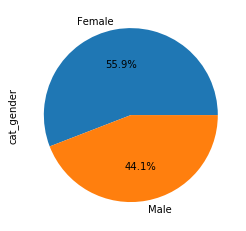

In [86]:
df['cat_gender'] = df_sbs['A3'].apply(lambda x: 'Male' if x == 1 else 'Female')
df['cat_gender'].value_counts().plot.pie(autopct="%.1f%%")
print(df['cat_gender'].value_counts())

#### R1:   Do Women Participate in the Stock Market at a Lower Rate Than Men?

dsafkj;asdfkjdsaf
          

#### R2: 1.   What are some of the factors that blah blah blah>

dsafkj;asdfkjdsaf

#### R2: 2. Do these factors disproportionally affect women?


dsafkj;asdfkjdsaf

<span id="discussion" />

### Discussion

<span id="conclusion" />

### Conclusion
blah blah blah

<span id="questions"/>

